In [4]:
import pandas as pd

In [5]:
housing = pd.read_csv("housing.csv")

In [6]:
#to see the first five value of a dataset
#to see the last five values we can use tail and to see the random values of a dataset we can use sample() method
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
#info() method helps in total number of rows, each column data type, number of null values
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
#to check the total number of null values present in each column
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [9]:
#to see the numerical statistics of dataset of numerical columns we can use describe function
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [10]:
#to check the different categories in a categorical columns and the count of each category we can use value_counts() method
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

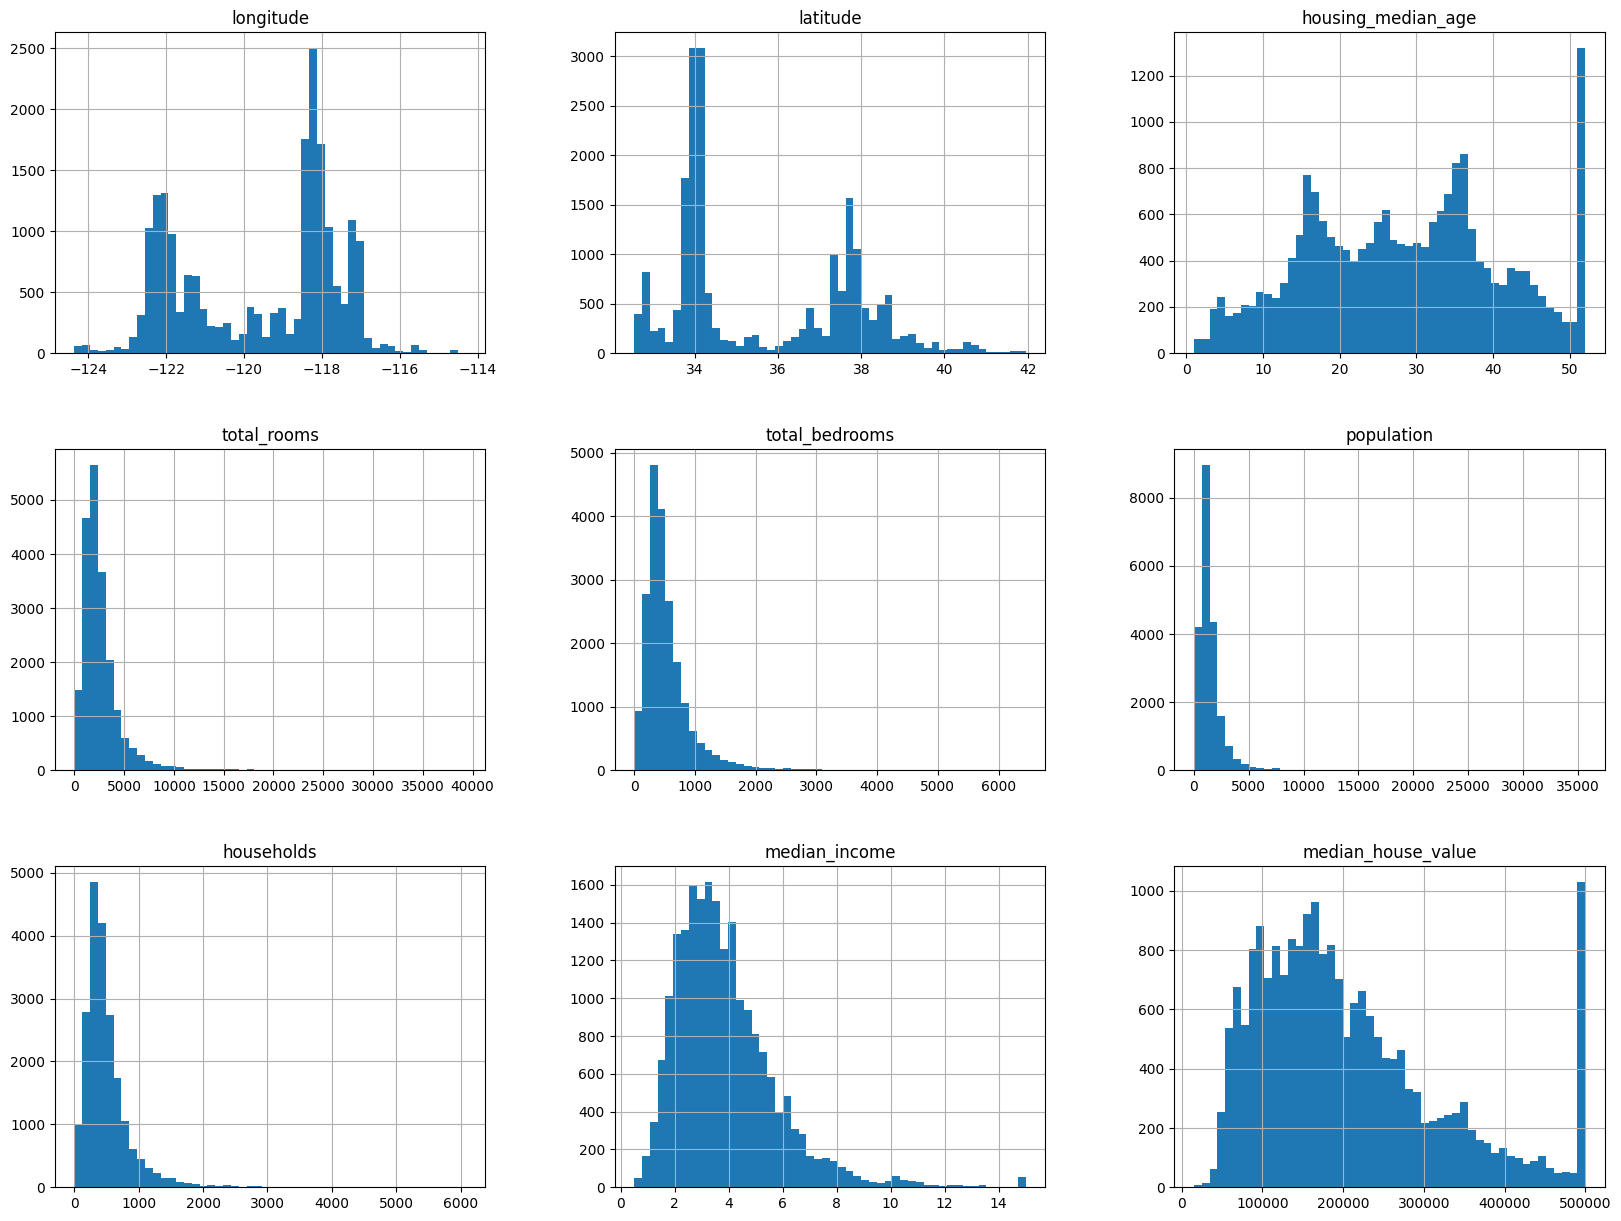

In [11]:
#you can plot histogram using hist(). you can either apply it on one attribute or apply on the whole dataset
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins = 50, figsize=(20, 15))
plt.show()

Few things to notice from above histogram:

1. The median income attribute is scaled and capped at 15 for higher and 0.5 for lower.
2. the housing median range and median house value were also capped.
3. these capping can cause because our ml model will never be able to predict values beyond that as it is not trained for it.
4. these attributes have different scales. We need to do feature scaling.
5. many histogram is tail heavy or right skewed. This will cause ml model to identify patterns in the data.

# Create a test set

In [12]:
#create a test set
# test set creation is important to avoid data snooping bias.
# if we know the test data and know the pattern then our brain can choose the model accordingly and dont train the model for overfitting. Thats why we want to remove the test data from before itself so that we can prevent overfitting the model.

import numpy as np

def split_train_test(data, test_ratio):
  shuffled_indices = np.random.permutation(len(data))
  test_set_size = int(len(data) * test_ratio)
  test_indices = shuffled_indices[:test_set_size]
  train_indices = shuffled_indices[test_set_size:]
  return data.iloc[test_indices], data.iloc[train_indices]

test_set, train_set = split_train_test(housing, 0.2)
print(len(test_set), len(train_set))


4128 16512


We got the train and test set, but there is a issue with above approach. As we will run it again and again it will always provide a different test and train set. Sooner or later the model will recognize whole dataset and then it will get overfit.

So we can proceed with using random number generator's seed before calling np.random.permutation to get the same shuffled indices everytime.

In [13]:
import numpy as np

def split_train_test(data, test_ratio):
  np.random.seed(42)
  shuffled_indices = np.random.permutation(len(data))
  test_set_size = int(len(data) * test_ratio)
  test_indices = shuffled_indices[:test_set_size]
  train_indices = shuffled_indices[test_set_size:]
  return data.iloc[test_indices], data.iloc[train_indices]

test_set, train_set = split_train_test(housing, 0.2)
print(len(test_set), len(train_set))

4128 16512


after using np.random.seed function we will always get the same shuffled indices.

Note: ideally we should go for more robust way to split the train test data as np.random.seed approach can also fail if we update the dataset.

common solution is to use each instance identifier to decide whether or not it should go to test set.

In [14]:
# possible implementation to split on unique identifier

from zlib import crc32

def test_set_check(identifier, test_ratio):
  return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
  ids = data[id_column]
  in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
  return data.iloc[in_test_set], data.iloc[~in_test_set]

In [16]:
# since housing dataset does not have a identifier column so we can use index to split on id
housing_with_id = housing.reset_index()
test_set, train_set = split_train_test_by_id(housing_with_id, 0.2, "index")

Scikit-learn provides train_test_split() function to do the splitting of train and test data which works same as split_train_test()


In [17]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

All the above way is purely random sampling methods where we choose a sample of observations from population randomly.

Random sampling technique is fine when you have large dataset but if you dont then there can be risk of sampling bias. sampling bias means to give weightage to particular category upon other.

So in such cases we should go for stratified sampling

Since our goal is to predict the median house pricing so we need to get the data from all range of categories in our training dataset to train the model.

<Axes: >

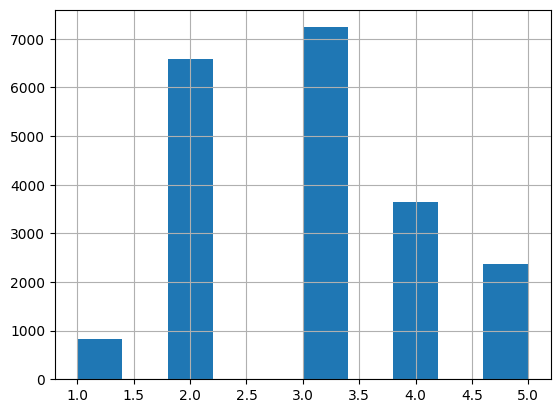

In [18]:
# we will add another column in the dataset for income categories

housing['income_cat'] = pd.cut(housing['median_income'], bins = [0, 1.5, 3.0, 4.5, 6.0, np.inf], labels = [1, 2, 3, 4, 5])
housing['income_cat'].hist()

In [19]:
#Now we are ready to do stratified sampling

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(housing, housing['income_cat']):
  strat_train_set = housing.loc[train_index]
  strat_test_set = housing.loc[test_index]

strat_test_set['income_cat'].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [20]:
# now since stratified sampling is don, we can get back to  original dataset by dropping income_cat column

for set_ in (strat_test_set, strat_train_set):
  set_.drop("income_cat", axis = 1, inplace = True)

In [21]:
strat_train_set.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        158
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Now our train and test set is ready

# Data Analysis

In [22]:
housing = strat_train_set.copy()

<Axes: xlabel='latitude', ylabel='longitude'>

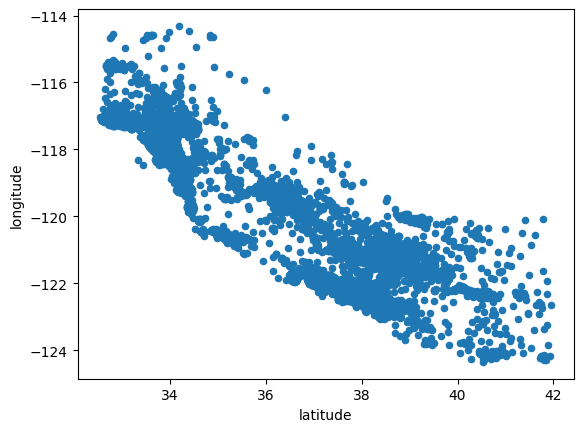

In [23]:
# to visulise the latitude and longitude, scatter plot will be best option

housing.plot(kind = "scatter", x =  "latitude", y = "longitude")

<Axes: xlabel='latitude', ylabel='longitude'>

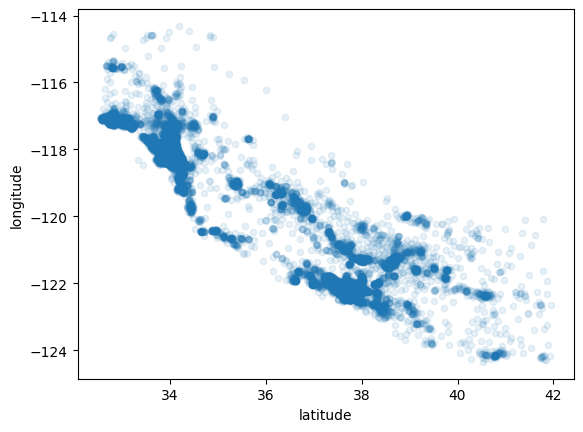

In [24]:
# to check the most dense populated area we can use alpha parameter to clearly visualise it
housing.plot(kind = "scatter", x =  "latitude", y = "longitude", alpha = 0.1)

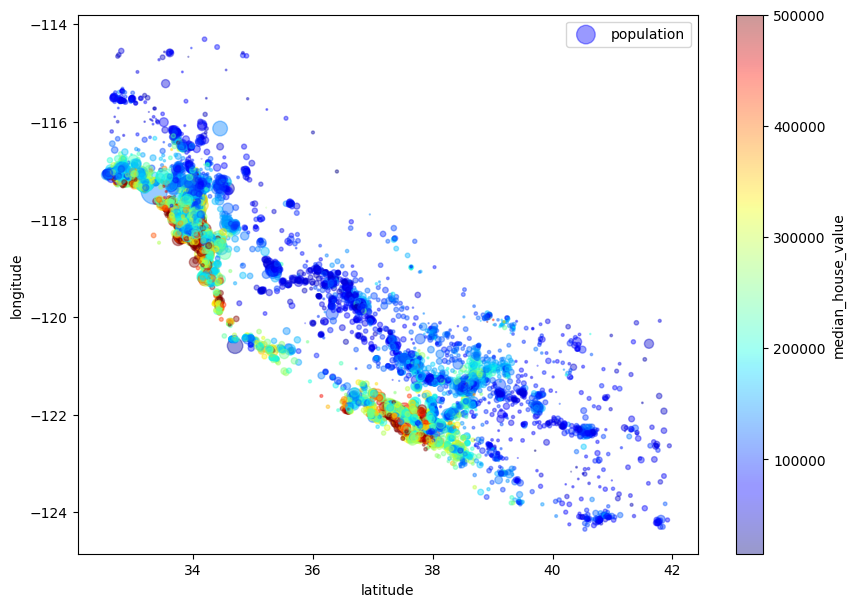

In [28]:
# the radius of each circle represents the district's population(option s) and the color represents the price(option c).
# We will use predefined colormap(option cmap) called jet which ranges from blue(low prices) to red(high prices)

housing.plot(kind = "scatter", x = "latitude", y = 'longitude', alpha = 0.4,
             s = housing['population']/ 100, label = "population", figsize = (10,7),
             c = "median_house_value", cmap = "jet", colorbar = True)
plt.legend()

The above figure shows that prices are very much related to population density

In [30]:
# we can use corr() method to measure the standard correlation coefficient(also called Pearson's r) between every attribute
#note: since it is a small dataset so we can go for correlation
corr_matrix = housing.corr()

<ipython-input-30-70b10f85d5b9>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


In [31]:
# to see how each attribute correlate with median house value
corr_matrix['median_house_value'].sort_values(ascending = True)

latitude             -0.142673
longitude            -0.047466
population           -0.026882
total_bedrooms        0.047781
households            0.064590
housing_median_age    0.114146
total_rooms           0.135140
median_income         0.687151
median_house_value    1.000000
Name: median_house_value, dtype: float64

The correlation coefficient ranges from -1 to 1.

When it is close to 1, it means that there is a strong positive correlation. and when the coefficient value is close to -1 it means there is a strong negative correlation. If it is close to 0 then it means it is neutral.

Note: The correlation coefficient only measures linear correlation. It may completely miss out the non linear correlation like if x is 0 then y generally goes up

Another way to check for correlation between attributes is through pandas scatter_matrix() fucntion which plots every numerical attribute against every another numerical attribute.

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

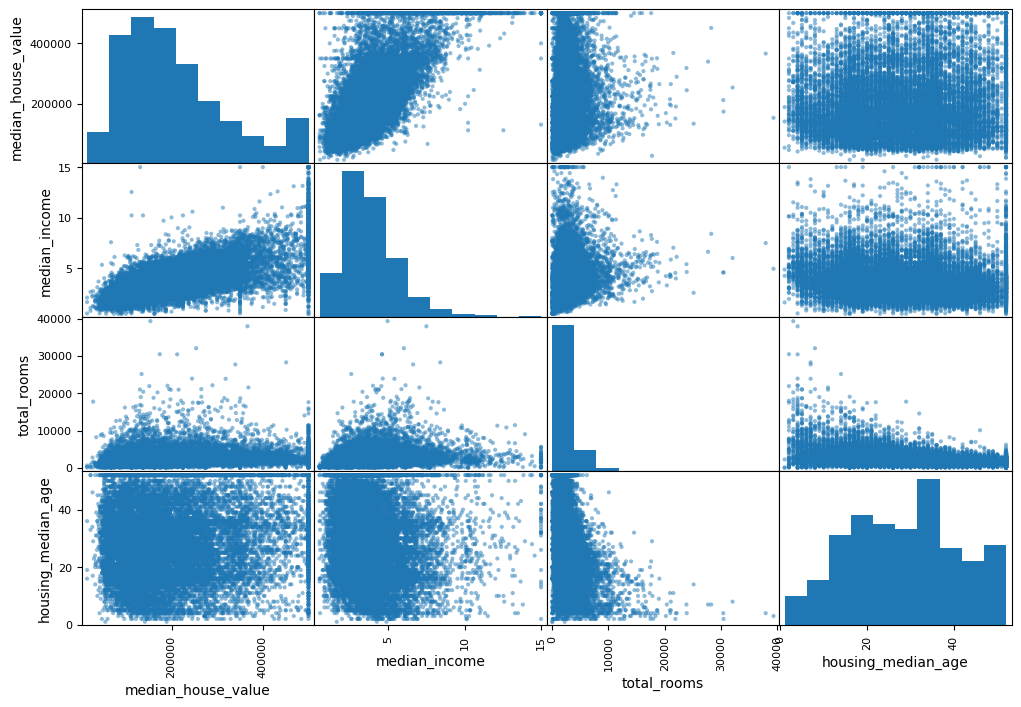

In [32]:
from pandas.plotting import scatter_matrix

attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize = (12, 8))

The main diagonal would be straight line which is not much useful, so pandas plot histogram instead.

<Axes: xlabel='median_income', ylabel='median_house_value'>

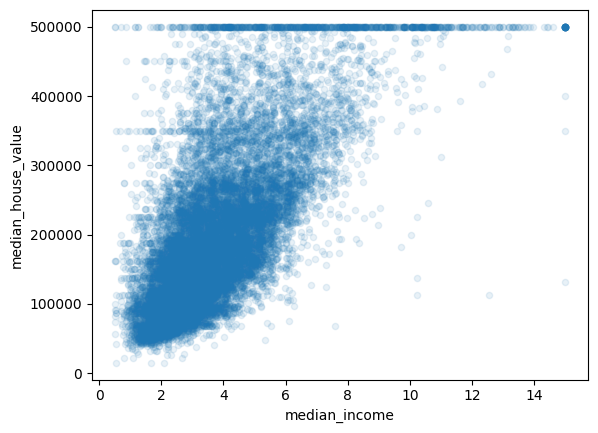

In [34]:
housing.plot(kind = "scatter",  x = "median_income", y = "median_house_value", alpha = 0.1)

We can clearly see upward trend and as we can notice the dataset is capped at 500000 value(by the horizontal line)

# Experimenting with Attribute Combinations

In [35]:
housing["rooms_per_household"] = housing['total_rooms']/ housing['households'] # rooms per household makes more sense than total rooms
housing["bedrooms_per_room"] = housing['total_bedrooms']/ housing['total_rooms']# bedrooms per rooms makes more sense than total bedrooms
housing["population_per_household"] = housing['population']/ housing['households']# population per household makes more sense than total population

In [37]:
# now lets try checking the correlation of the attributes

corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values()

<ipython-input-37-23b4e8d303e3>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


bedrooms_per_room          -0.259952
latitude                   -0.142673
longitude                  -0.047466
population                 -0.026882
population_per_household   -0.021991
total_bedrooms              0.047781
households                  0.064590
housing_median_age          0.114146
total_rooms                 0.135140
rooms_per_household         0.146255
median_income               0.687151
median_house_value          1.000000
Name: median_house_value, dtype: float64

As we can see bedrooms_per_rooms is much more correlated than total_bedrooms

# Data Cleaning

Most machine learning algorithm doesn't work with missing features.

In [46]:
housing = strat_train_set.drop("median_house_value", axis = 1)
housing_labels = strat_train_set["median_house_value"].copy()

In [40]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        158
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

In [42]:
housing.shape

(16512, 9)

We can do three things to tackle missing values:

1. Get rid of the rows.
2. Get rid of the columns.
3. Fill the missing values(with value or mean, median, mode)

In [41]:
housing.dropna(subset=["total_bedrooms"]) #option 1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,<1H OCEAN
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,INLAND
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,<1H OCEAN
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,<1H OCEAN


In [44]:
housing.drop("total_bedrooms", axis=1) #option 2

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,1837.0,580.0,4.4964,<1H OCEAN
...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,2026.0,1001.0,5.0900,<1H OCEAN
12661,-121.42,38.51,15.0,7901.0,4769.0,1418.0,2.8139,INLAND
19263,-122.72,38.44,48.0,707.0,458.0,172.0,3.1797,<1H OCEAN
19140,-122.70,38.31,14.0,3155.0,1208.0,501.0,4.1964,<1H OCEAN


In [45]:
median = housing['total_bedrooms'].median() # option 3
housing["total_bedrooms"].fillna(median, inplace = True)

Scikit learn provides a class to deal with missing values called SimpleImputer.
It can be applied on whole dataset but to only numerical columns

In [47]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [48]:
housing_num = housing.drop('ocean_proximity', axis = 1)

In [51]:
# by using fit method the imputer has computed the median value for each attribute and stored it in statistics_ instance variable
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [52]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [53]:
# we can use this trained imputer to transform the training set by replacing missing values with above median

X = imputer.transform(housing_num)

the result of transform is a plain Numpy array containing the transformed features.

In [54]:
housing_tr = pd.DataFrame(X, columns = housing_num.columns, index = housing_num.index)
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


In [55]:
housing_tr.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

Now we have seen how to deal with missing numerical attributes

## Handling text and categorical attributes

In [58]:
housing_cat = housing[["ocean_proximity"]]

In [59]:
housing_cat.head()

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('ocean_proximity').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

As we can see there are limited number of values, each representing a category.

So we need to convert these categories from text to numbers.

We can use Scikit-learn's OrdinalEncoder class

In [64]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

numerical values has been assigned to the categories

In [63]:
# to get the list of categories we can use categories_ instance variable

ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

One issue with the above approach is that ML Algorithm can assume that two nearby values are more similar than two distinct values. This is fine in some scenarios where order matters like(good, average, bad) but that is not the scenario here.

to fix the above issue we can create a binary attribute per category where one attribute is equal to 1 and rest others will be 0. this is called one-hot encoding.

Now we can implement this using either get_dummies() method or using scikit-learn provides a OneHotEncoder class to convert categoricals to one hot vectors.

In [65]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

The above code outputs Scipy sparse matrix instead of numpy array.

Sparse matrix are those matrix which contains mostly zero values.

It is better to have sparse matrix instead of numpy array because it only occupies space/memory for non zero values. It will be good for performance point.

In [66]:
#to convert the sparse matrix to numpy array
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [67]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]